In [1]:
%matplotlib inline
from zhu import *
import imp

In [5]:
imp.reload(zhu)
from zhu import *

2


TypeError: 'AxesSubplot' object does not support indexing

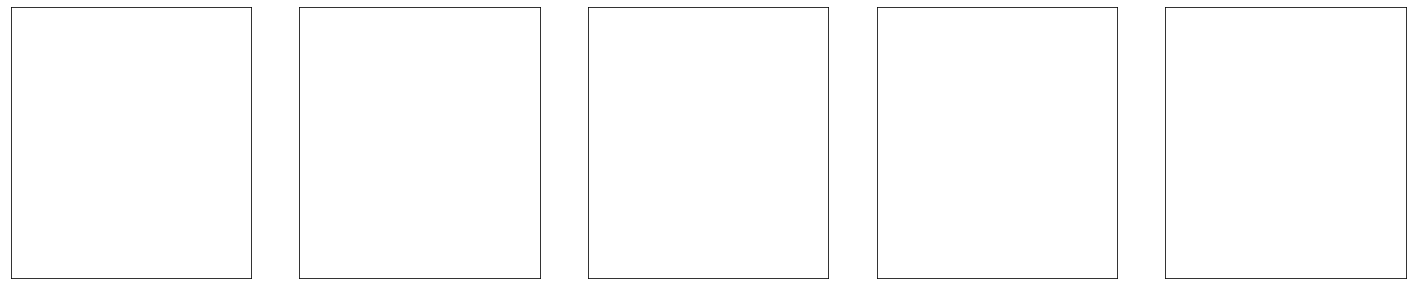

In [2]:
folder = 'to_visapp/many'
many_objects(2, 'data/'+folder,'data/'+folder+'_result', 'png')

20


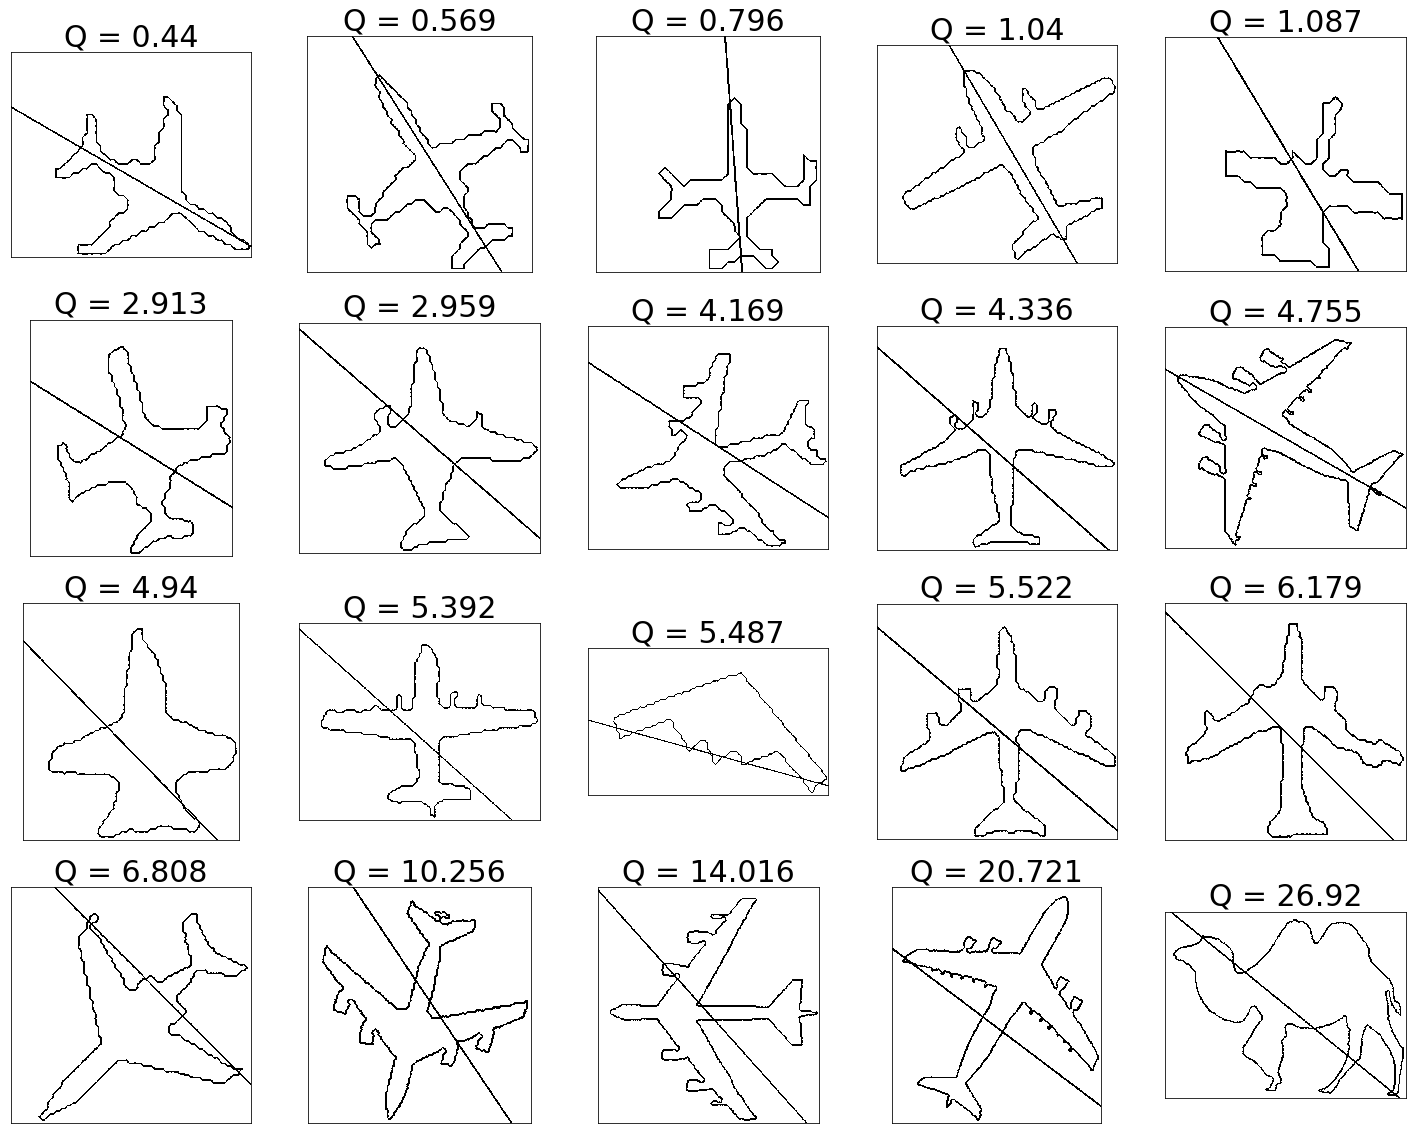

In [3]:
folder = 'to_visapp/planes'
many_objects(5, 'data/'+folder,'data/'+folder+'_result', 'png')

In [10]:
imp.reload(zhu)
from zhu import *

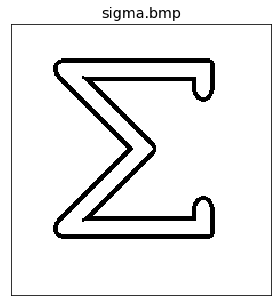

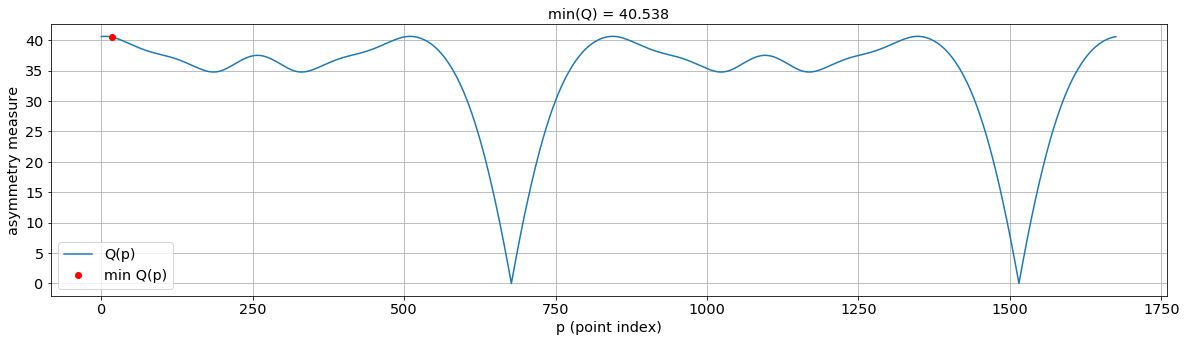

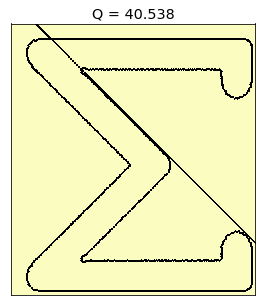

In [4]:
folder = 'to_visapp/by_one'
save_results('data/'+folder,'data/'+folder+'_result',False,'csv','png')

In [2]:
import zhu_draw
import zhu_contour
import zhu_symmetry

import numpy as np
from matplotlib import pyplot as plt

In [71]:
import imp
imp.reload(zhu_contour)
imp.reload(zhu_draw)
imp.reload(zhu_symmetry)

<module 'zhu_symmetry' from 'C:\\Users\\Александра\\PROGRAM\\Symmetry\\zhu_symmetry.py'>

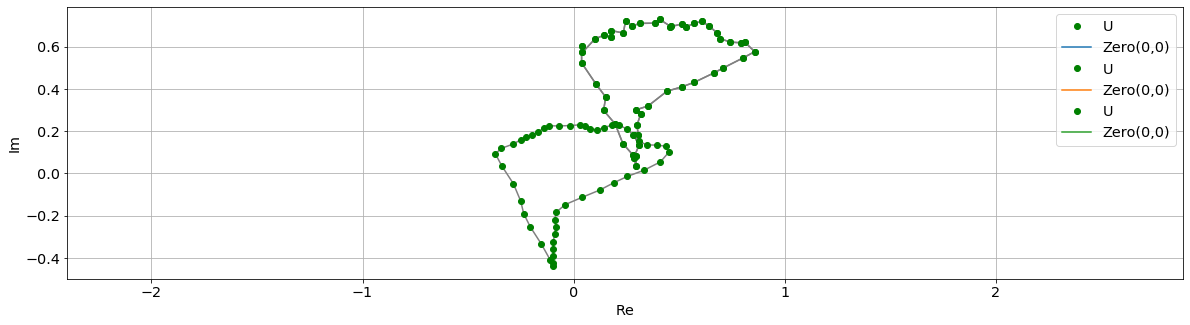

In [51]:
u = np.array([1+5j, 3+1j, 3+3j, 7+5j, 5+6j, 3+6j])
u_m = zhu_contour.preprocess(u,3)
u_m += (np.random.random(u_m.size)+1j*np.random.random(u_m.size))*0.05
zhu_draw.contour(u_m)
f = np.fft.fft(u_m)
ind = zhu_symmetry.f_abs_based_index(f, beta = 0.5)
f1 = np.zeros(len(f),dtype=complex)
f1[ind] = f[ind]
zhu_draw.contour(np.fft.ifft(f))
zhu_draw.contour(np.fft.ifft(f1))

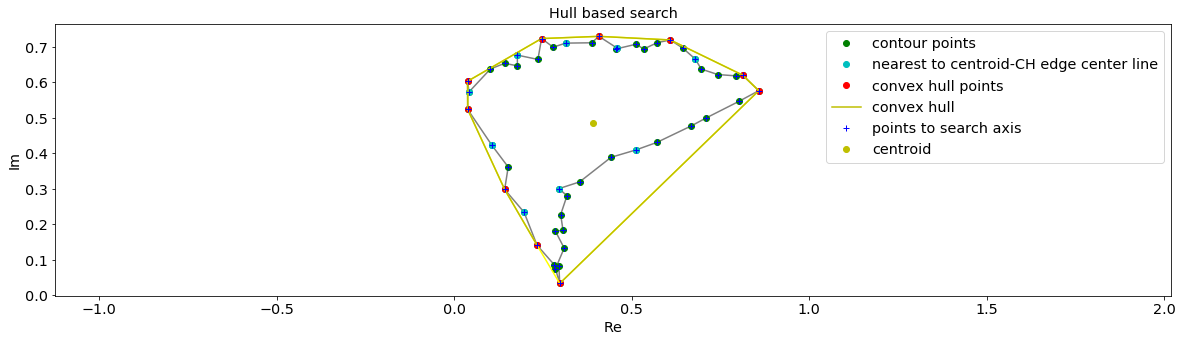

In [74]:
by_hull, h_m, hull = zhu_symmetry.hull_based_index(u_m, 0.5)
zhu_draw.plot_hull(u_m, u_m[by_hull], u_m[h_m], u_m[hull])
plt.show()